# Part 1: Data from a mysterious celltype

Your collaborators performed ChIP-seq for two different factors in a mysterious new cell type.

They send you a file with DNA sequences and the matched profiles for a set of regions.

They believe there is an interaction between the two factors, but would like your help modeling and analyzing the data. 

Try to answer their questions concisely.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import io
import h5py

In [2]:
def download_h5(dataset_url, filename = 'dataset.h5'):
  with requests.Session() as session:
      r = session.get(dataset_url, stream=True)
      r.raise_for_status()
      with open(filename, 'wb') as hd5:
          for chunk in r.iter_content(chunk_size=io.DEFAULT_BUFFER_SIZE):
              hd5.write(chunk)

In [3]:
DATA_URL = 'https://raw.githubusercontent.com/Fudenberg-Research-Group/2022_seq-to-profile/main/dataset1.h5'

download_h5(DATA_URL, filename = 'dataset1.h5')

In [4]:
### reading in the h5 data 
with  h5py.File('dataset1.h5', 'r') as h:
    sequences = h['seqs'].asstr()[()]
    targets = h['targets'][()]

Text(0.5, 0, 'position, bp')

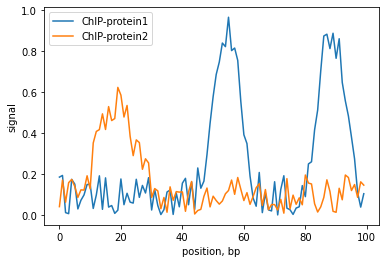

In [5]:
## To take a quick look at one of their profiles
plt.plot( targets[0,:,0], label='ChIP-protein1');

plt.plot( targets[0,:,1], label='ChIP-protein2');
plt.legend()
plt.ylabel("signal")
plt.xlabel("position, bp")

## 1.0 Try to fit the data with a seq-to-profile neural network. 
- Follow similar steps to those taken in the [Zou et al primer](https://colab.research.google.com/drive/17E4h5aAOioh5DiTo7MZg4hpL6Z_0FyWr#scrollTo=qSOUwoG_vHRA), e.g.: 
  - one-hot encode the DNA, 
  - set aside a test set, 
  - define a convolutional architecture, perhaps with additional or modified layers
  - consider what sort of loss function and activation to use. 
- Use [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Report your test set accuracy. Report an interpretable metric as well. 
- Where does the model do well or struggle? 


Note: if the validation loss is not decreasing during training, the specified model may not be well-matched for the problem at hand. Consider how to modify the model (e.g. a model with sigmoid activation at the final layer would never be able to learn negative values).

In [9]:
sequences = list(filter(None, sequences))
pd.DataFrame(sequences, index=np.arange(1, len(sequences)+1), 
             columns=['Sequences']).head()

,Sequences
1,CGATGTGTCCTCAAGTACCATCGGCGCCTTGACCTCCCCCCTGCCA...
2,TTTGCAGGGTTTGTCTGGGCAGTAGTGGTAGTTTCAGTGCCTCTCT...
3,CTGGGAGGGCCGAACCTGGTTGCAGGGATCCCCTCCCCTTCTAACC...
4,CGTAATCTCATCTTCTGTCCATAATGGGGGAGGGTACCGGCGCTCC...
5,ACTCCGGGGAGGGGTTCACACGTTGCGACCATAACCACCCGCGAGC...


## One Hot Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# The LabelEncoder encodes a sequence of bases as a sequence of integers.
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in sequences:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 CGATGTGTCC ... GGGAGTGGGT
One hot encoding of Sequence #1:
 [[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
labels = list(filter(None, targets))  # removes empty sequences

one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

## 1.1 Can you determine any rule(s) that influence the profiles for the two factors?
Try saliency mapping as employed in the primer. Are there motifs, or an interplay between motifs, that boost or dampen the profiles? 

In [11]:
print("hello!")

hello!


#Part 2: More data from another mysterious cell type

Your collaborators send you an update: they performed ChIP-seq for the same two factors in a yet another mysterious cell type and are getting puzzling results. They send you a second file. Seems like they are pretty good collaborators!

In [ ]:
DATA_URL2 = 'https://raw.githubusercontent.com/Fudenberg-Research-Group/2022_seq-to-profile/main/dataset2.h5'


## 2.0 Does your model trained on the original data predict this data well or poorly? 

## 2.1 Does a model re-trained on this new dataset reach the same level of predictive ability?

## 2.2 Can you determine different rule(s) for the influence on the profiles in this new cell type?